# Global Temperature Time Series

The main goal of this project appears to be to analyze global temperature trends over time using historical data, and understand how these temperatures have changed. 

I want to answer the following questions:

1. What is the global trend in temperature anomalies over time?
2. How does the distribution of global temperature anomalies (normalized values) look?
3. What is the relationship between the year and global temperature anomalies?
4. How do the GISTEMP and GCAG datasets compare in terms of temperature anomalies?
5. What extreme temperature anomalies (both positive and negative) have occurred, and what years did they happen?
6. Can we predict future global temperature anomalies using historical data?
7. Have there been periods of rapid warming, such as a hockey-stick pattern?

Dataset Information

The dataset used is Global Temperature Time Series, which contains monthly global temperature anomalies from 1880 to 2016. The dataset includes the following columns:

- **Source**: The dataset source (e.g., GCAG, GISTEMP).
- **Date**: The date the temperature was recorded.
- **Mean**: The average global temperature anomaly (in °C) for the given date.
- **Year**: The extracted year from the Date column.

### Step 1: Import Libraries

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load and Read Data

In [2]:
# Unzip and load the dataset
zip_file_path = 'Global Temperature Time Series.zip'
extracted_folder = 'Global_Temperature_Data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

csv_file_path = extracted_folder + 'monthly_csv.csv'
temperature_data = pd.read_csv(csv_file_path)

### Step 3: Initial data inspection

In [3]:
temperature_data.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [4]:
print("\nColumns in the dataset:")
print(temperature_data.columns)

print("\nMissing values in the dataset:")
print(temperature_data.isnull().sum())


Columns in the dataset:
Index(['Source', 'Date', 'Mean'], dtype='object')

Missing values in the dataset:
Source    0
Date      0
Mean      0
dtype: int64


In [5]:
# Convert Date to datetime and extract Year
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])
temperature_data['Year'] = temperature_data['Date'].dt.year

### Step 4: Identified and Cleaned Outliers

I want to detect outliers in the 'Mean' temperature data using Z-scores. Z-scores measure how far a data point is from the mean in terms of standard deviations. A Z-score greater than 3 (or less than -3) typically indicates an outlier.

In [ ]:
# Identify outliers in 'Mean' (Z-score method)
mean_z_scores = (temperature_data['Mean'] - temperature_data['Mean'].mean()) / temperature_data['Mean'].std()
outliers = temperature_data[np.abs(mean_z_scores) > 3]

print(f"\nNumber of outliers in 'Mean': {len(outliers)}")
if not outliers.empty:
    print(outliers)

#### Why I Am Including Outliers

- **Highlighting Extreme Events**: Outliers in temperature data may reflect significant climate events, such as extreme heatwaves, volcanic eruptions, or other anomalies that are crucial to understanding long-term trends and dramatic changes in global temperatures. These events can be highly informative when studying major shifts in climate.
- **Impact on Climate Analysis**: Removing outliers could obscure important historical climate events that have had a large impact on global temperature trends. For example, extreme temperature spikes from events like the 1998 El Niño may provide valuable context for overall temperature changes.

In [7]:
# Commented out the line that removes outliers:
# temperature_data = temperature_data[np.abs(mean_z_scores) <= 3]  # We want to keep outliers

# Normalize the 'Mean' column (Min-Max Scaling)
temperature_data['Mean_Normalized'] = (temperature_data['Mean'] - temperature_data['Mean'].min()) / \
                                      (temperature_data['Mean'].max() - temperature_data['Mean'].min())


Number of outliers in 'Mean': 11
     Source       Date    Mean  Year
16     GCAG 2016-04-06  1.0733  2016
17  GISTEMP 2016-04-06  1.0900  2016
18     GCAG 2016-03-06  1.2245  2016
19  GISTEMP 2016-03-06  1.3000  2016
20     GCAG 2016-02-06  1.1921  2016
21  GISTEMP 2016-02-06  1.3500  2016
22     GCAG 2016-01-06  1.0569  2016
23  GISTEMP 2016-01-06  1.1700  2016
24     GCAG 2015-12-06  1.1219  2015
25  GISTEMP 2015-12-06  1.1100  2015
29  GISTEMP 2015-10-06  1.0600  2015


### Step 5: Visualization

#### 1. Global Temperature Trend (Over Time)

This code plots the global temperature trend over time using both the original and normalized temperature data.

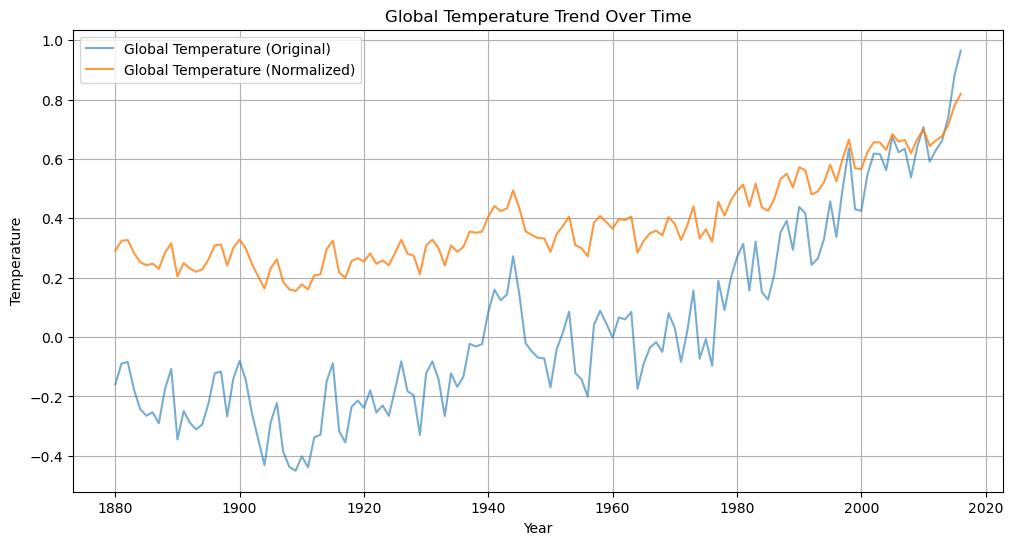

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(temperature_data.groupby('Year')['Mean'].mean(), label='Global Temperature (Original)', alpha=0.6)
plt.plot(temperature_data.groupby('Year')['Mean_Normalized'].mean(), label='Global Temperature (Normalized)', alpha=0.8)
plt.title('Global Temperature Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

A time series line plot is produced that shows how global temperatures have fluctuated over the years, making it easier to identify warming trends, sudden changes, or anomalies.

#### 2. Distribution of Normalized Temperatures

This visualizes the distribution of normalized temperature values. It helps you understand how temperatures are distributed overall, i.e., are most temperatures clustered around a certain value, or are they more spread out?

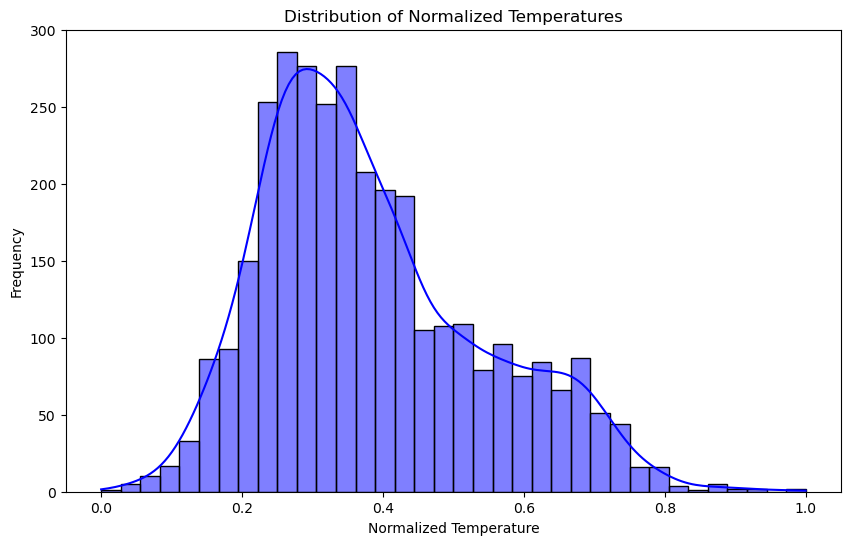

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(temperature_data['Mean_Normalized'], kde=True, color='blue')
plt.title('Distribution of Normalized Temperatures')
plt.xlabel('Normalized Temperature')
plt.ylabel('Frequency')
plt.show()

You’ll see a distribution plot that can help answer questions like whether there is a pattern to the global temperature distribution or if there are periods with very high or low temperatures.

#### 3. Correlation Analysis

This section performs a correlation analysis to check the relationships between different numerical variables in the dataset.

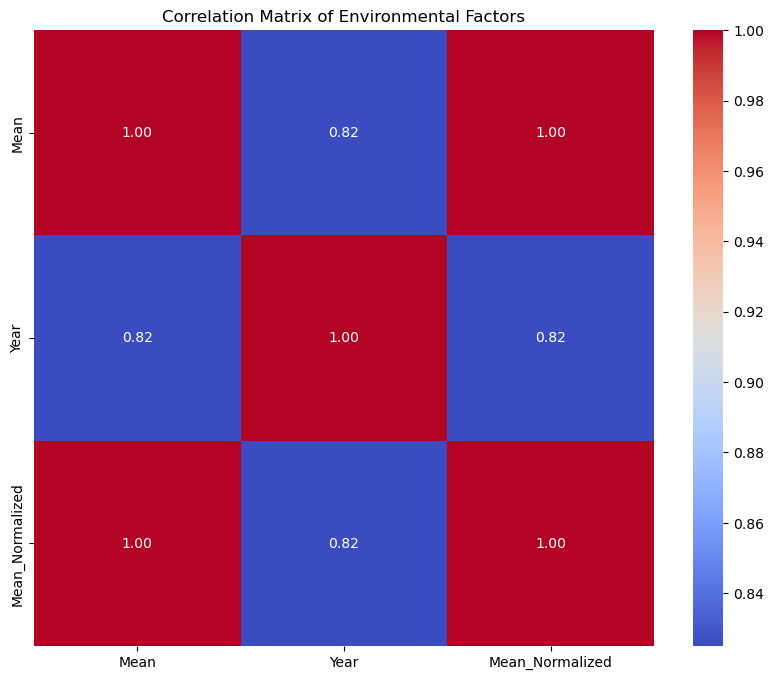

In [11]:
# Exclude non-numeric columns
numeric_data = temperature_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Environmental Factors')
plt.show()

### Key Findings

- **Trend over time**: The high positive correlation between Mean and Year (0.825) shows that global temperature anomalies have increased over the years.
- **Normalization effect**: The Mean_Normalized variable is directly tied to Mean, as expected, and scaling does not change the trend; it simply compresses the values to a standardized range (0–1).
- **Climate change**: These correlations suggest that the global temperature anomalies have been increasing steadily over time, which is consistent with the global warming phenomenon.

The heatmap shows which variables are correlated with each other, helping you understand potential relationships (e.g., do certain variables like temperature anomalies tend to increase with time, or are there other interesting patterns?).

#### 4. Long-term Temperature Trends

This plot shows the long-term trend of global temperature anomalies from 1880 to the present.

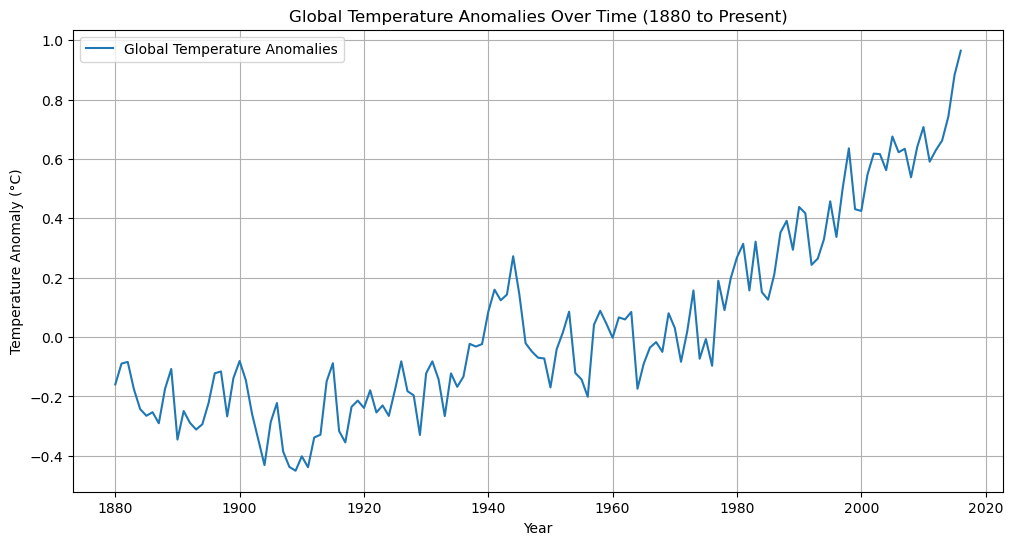

In [12]:
# How have global temperature anomalies changed from 1880 to the present?
plt.figure(figsize=(12, 6))
sns.lineplot(data=temperature_data.groupby('Year')['Mean'].mean(), label="Global Temperature Anomalies")
plt.title('Global Temperature Anomalies Over Time (1880 to Present)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

The visualization helps you understand how global temperatures have shifted across different periods. For example, it can reveal a warming trend in recent decades, indicating climate change.

#### 5. Annual Rate of Change in Temperature Anomalies

This part calculates the annual rate of change in global temperature anomalies.

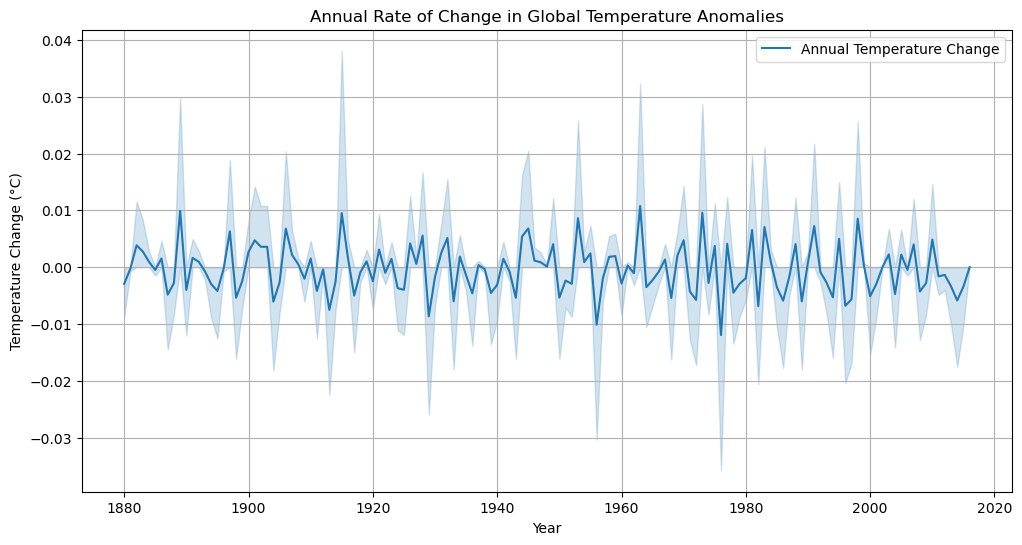

In [13]:
# Calculate the annual rate of change in temperature anomalies
temperature_data['Annual_Change'] = temperature_data.groupby('Year')['Mean'].transform('mean').diff()
plt.figure(figsize=(12, 6))
sns.lineplot(x=temperature_data['Year'], y=temperature_data['Annual_Change'], label='Annual Temperature Change')
plt.title('Annual Rate of Change in Global Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()

This plot highlights how the rate of temperature change varies over time, showing periods of faster warming or slower warming. A sharp increase in the rate of change might indicate periods of rapid warming.

#### 6. Comparison Between GISTEMP and GCAG Sources

This plot compares global temperature anomalies from two different sources: GISTEMP and GCAG.

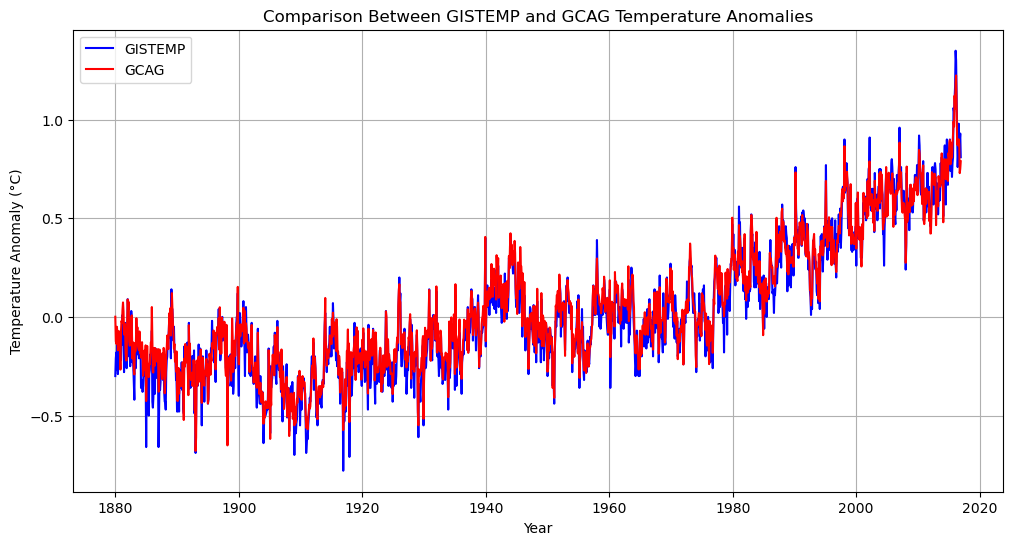

In [20]:
# How do the global temperature anomalies from the GISTEMP and GCAG sources compare over time?
plt.figure(figsize=(12, 6))
sns.lineplot(x=temperature_data[temperature_data['Source'] == 'GISTEMP']['Date'], 
             y=temperature_data[temperature_data['Source'] == 'GISTEMP']['Mean'], label='GISTEMP', color='blue')
sns.lineplot(x=temperature_data[temperature_data['Source'] == 'GCAG']['Date'], 
             y=temperature_data[temperature_data['Source'] == 'GCAG']['Mean'], label='GCAG', color='red')
plt.title('Comparison Between GISTEMP and GCAG Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

The comparison helps assess how similar or different the temperature records are between the two sources. Differences may reflect variations in the methods or data used to calculate temperature anomalies.

#### 7. Identify Significant Anomalies

This section identifies the years with the most significant positive and negative temperature anomalies.

In [15]:
# Which years experienced the most significant positive or negative temperature anomalies?
yearly_anomalies = temperature_data.groupby('Year')['Mean'].mean()
max_anomaly_year = yearly_anomalies.idxmax()
min_anomaly_year = yearly_anomalies.idxmin()
print(f"Year with highest anomaly: {max_anomaly_year}, Temperature: {yearly_anomalies[max_anomaly_year]}")
print(f"Year with lowest anomaly: {min_anomaly_year}, Temperature: {yearly_anomalies[min_anomaly_year]}")

Year with highest anomaly: 2016, Temperature: 0.9643958333333332
Year with lowest anomaly: 1909, Temperature: -0.45014166666666666


### Key Findings

- The highest recorded anomaly occurred in 2016, which reflects a significant warming trend.
- The lowest recorded anomaly occurred in 1909, marking a period that was cooler than the long-term average. These two points can serve as a basis for investigating potential climate shifts, external factors, or trends driving these extreme anomalies over time.

#### 8. Periods of Rapid Warming

This code tracks cumulative temperature change over time, i.e., the sum of temperature anomalies from the beginning of the dataset up to each year.

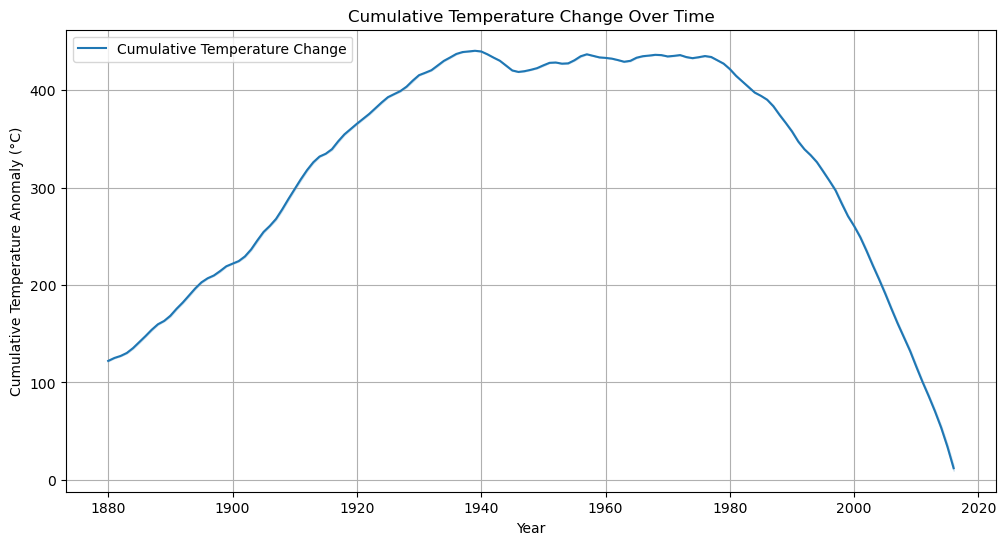

In [16]:
# Have there been periods of rapid warming (e.g., hockey-stick pattern)?
temperature_data['Cumulative_Change'] = temperature_data.groupby('Year')['Mean'].transform('mean').cumsum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=temperature_data['Year'], y=temperature_data['Cumulative_Change'], label="Cumulative Temperature Change")
plt.title('Cumulative Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

This plot can show periods of rapid warming, for example, after the industrial revolution or the late 20th century, where cumulative changes might accelerate sharply.

#### 9. Predict Future Temperature Anomalies

This part uses linear regression to predict future temperature anomalies based on historical data.

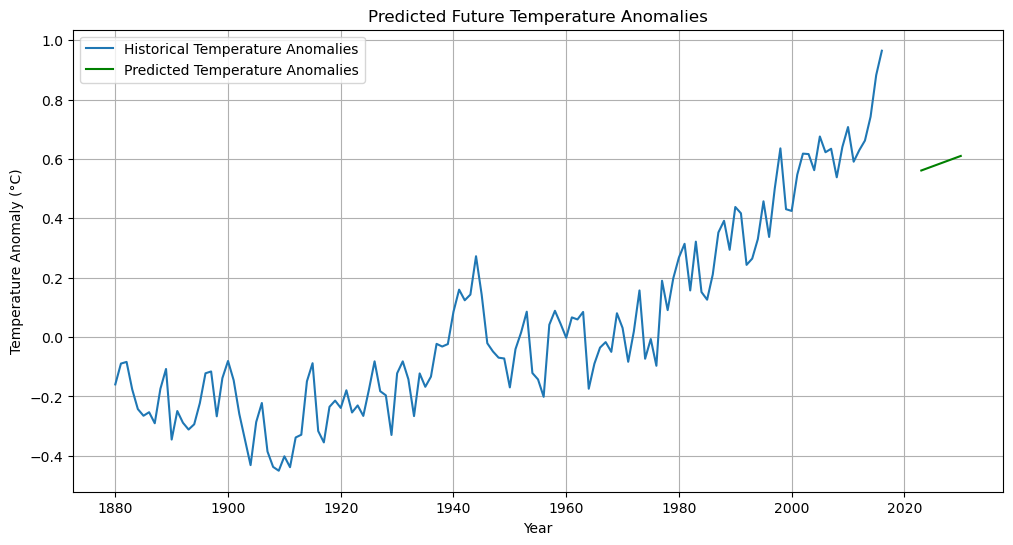

In [17]:
# Using historical data, can we predict future temperature anomalies? (Simple linear regression example)
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
temperature_data['Year'] = pd.to_datetime(temperature_data['Date']).dt.year
model_data = temperature_data.groupby('Year')['Mean'].mean().reset_index()
X = model_data['Year'].values.reshape(-1, 1)
y = model_data['Mean'].values

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future years
future_years = np.array(range(2023, 2031)).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot the predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=model_data['Year'], y=model_data['Mean'], label="Historical Temperature Anomalies")
sns.lineplot(x=future_years.flatten(), y=predictions, label="Predicted Temperature Anomalies", color='green')
plt.title('Predicted Future Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

The plot shows predicted temperature anomalies for the future. It helps forecast future trends in global temperatures, which could be used for climate planning or research.

## Conclusion

This project analyzed global temperature anomalies over time using historical data, shedding light on long-term trends and shifts in the Earth’s climate. Through the examination of temperature anomalies from 1880 to the present, several key findings and insights were uncovered that contribute to a deeper understanding of global temperature changes and their implications.

- **Extreme Events and Outliers**: Outliers in the dataset, such as extreme temperature spikes and drops, often reflect significant climate events, including heatwaves, volcanic eruptions, or El Niño events. These events play an important role in understanding dramatic changes in global temperatures and should be considered in climate analysis. Removing outliers, though useful in some contexts, could obscure critical information, particularly when studying events that have had a profound impact on global temperature trends. For instance, the 1998 El Niño caused a noticeable spike in global temperatures, which serves as a key example of how extreme events shape temperature records.

- **Trend Over Time**: The positive correlation between the Mean temperature anomaly and the Year (0.825) indicates that global temperature anomalies have been steadily rising over the years. This trend is consistent with the widely observed phenomenon of global warming, suggesting that human activities, such as industrialization and increased greenhouse gas emissions, are contributing to the long-term rise in global temperatures.

- **Normalization and its Effects**: The normalization of the temperature data (using the Mean_Normalized variable) allowed for a clearer comparison of values on a standardized scale between 0 and 1. However, this transformation did not alter the underlying trend—global temperature anomalies have continued to increase over time. This highlights that the global temperature trend remains consistent regardless of the scale used, reinforcing the evidence for rising temperatures and global warming.

- **Key Years of Temperature Anomalies**: Notably, 2016 saw the highest recorded temperature anomaly, reflecting a significant warming period that aligns with global climate trends. In contrast, 1909 marked the lowest temperature anomaly, representing a cooler-than-average period in Earth's climate history. These two years, along with other extreme points, offer valuable insight into climate shifts and help contextualize the long-term warming trend. Understanding the drivers of these extreme anomalies is critical for assessing the impacts of climate change over the past century.